In [1]:
import numpy as np

import pandas as pd
import random

filename = "../data/external/train.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 1000000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
print(n)

40428967


There are 40428967 records in the orginal dataset, to fit this data into memory i've randomly sampled 1M records to do EDA! 

In [2]:
df = pd.read_csv(filename, skiprows=skip)
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10005334911727438633,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,4,0,21665,320,50,2493,3,35,-1,117
1,10005609489911213467,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,1,0,21611,320,50,2480,3,297,100111,61
2,10011085150831357375,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,-1,79
3,10014764617325763141,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15703,320,50,1722,0,35,-1,79
4,10016930469746015079,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79


In [10]:
# df[[df.columns!='click']].head()
df.loc[[i for i in train.columns if i!= 'click']]

TypeError: bad operand type for unary ~: 'str'

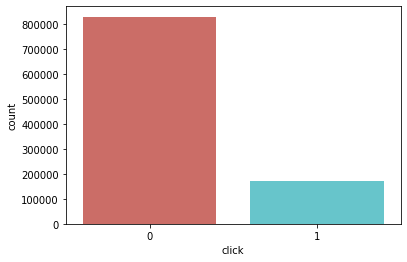

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='click',data=df,palette='hls')
plt.show()

In [4]:
df['click'].value_counts()

0    829706
1    170294
Name: click, dtype: int64

* The problem we are going to solve is to predict whether the add will be clicked or not , so this is binary classification problem.
* In our dataset click is the target column, As you can see the above plot and value counts, it is clear that there is a imbalance in our dataset.

Lets parse the date time column (hour) and analyse based on that

In [5]:
df['hour'] = pd.to_datetime(df['hour'],format='%y%m%d%H')

In [6]:
df.head(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002044883120869786,0,2014-10-21,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,1,0,19771,320,50,2227,0,687,100077,48
1,10003539039235338011,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,100084,79
2,10014885175555340290,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,100083,79
3,10018076683759767024,1,2014-10-21,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21300,320,50,2446,3,171,100228,156
4,10020307723259138743,0,2014-10-21,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
5,1002186989067144726,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100084,79
6,10024660782388112342,1,2014-10-21,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17614,320,50,1993,2,1063,100083,33
7,10032235721168274495,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,100084,79
8,10035308909297405174,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,100084,79
9,10038150103125219405,1,2014-10-21,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17654,300,250,1994,2,39,100084,33


In [7]:
df.hour.describe(datetime_is_numeric=True)

count                          1000000
mean     2014-10-25 22:39:27.550800896
min                2014-10-21 00:00:00
25%                2014-10-23 04:00:00
50%                2014-10-26 02:00:00
75%                2014-10-28 14:00:00
max                2014-10-30 23:00:00
Name: hour, dtype: object

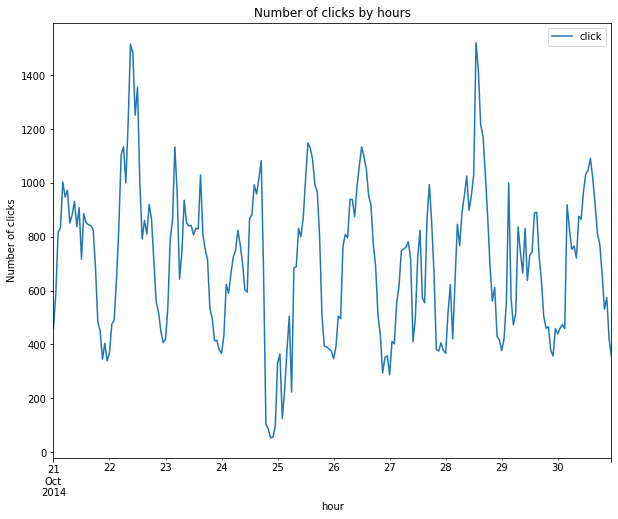

In [8]:
df.groupby(by='hour').agg({'click':'sum'}).plot(figsize=(10,8))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hours')
plt.show();

This plot show that most of the days have average numbers of click, but there are couple of peak's in mid day of 22nd and 28th oct, and there is bottom on 24th mid night

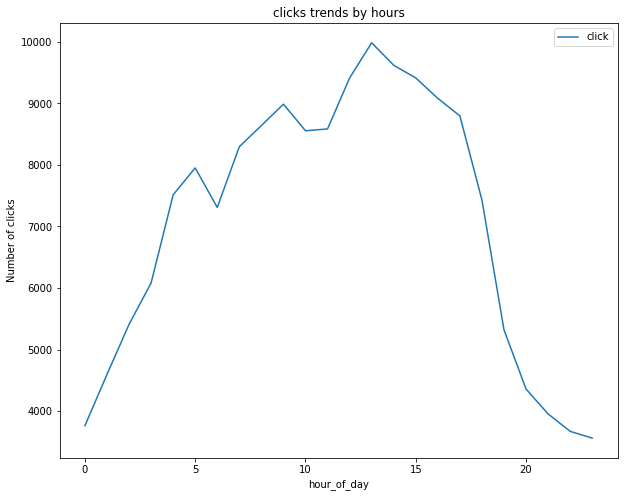

In [9]:
df['hour_of_day'] = df['hour'].apply(lambda x:x.hour)
df.groupby(by='hour_of_day').agg({'click':'sum'}).plot(figsize=(10,8))
plt.ylabel('Number of clicks')
plt.title('clicks trends by hours')
plt.show();

the highest number of clicks is at hour 13 and 14 (1pm and 2pm), and the lowest number of clicks is at hour 0 (mid-night)

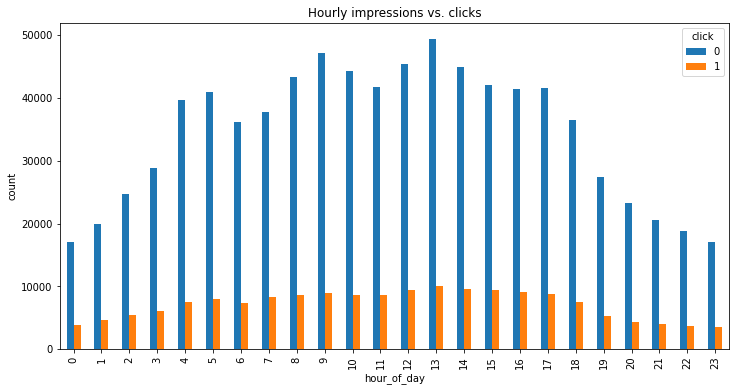

In [10]:
df.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar',title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

In [11]:
df_click = df[df['click']==1]
df_hour = df[['hour_of_day','click']].groupby(by=['hour_of_day']).count().reset_index()
df_hour=df_hour.rename(columns={'click':'impression'})
df_hour['clicks']=df_click[['hour_of_day','click']].groupby(by=['hour_of_day']).count().reset_index()['click']
df_hour['ctr']=df_hour['clicks']/df_hour['impression']*100
df_hour

,hour_of_day,impression,clicks,ctr
0,0,20862,3765,18.047167
1,1,24590,4598,18.698658
2,2,30155,5410,17.940640
3,3,34861,6083,17.449299
4,4,47140,7514,15.939754
5,5,48890,7951,16.263039
6,6,43536,7309,16.788405
7,7,46050,8296,18.015201
8,8,51926,8639,16.637137
9,9,56159,8986,16.000997


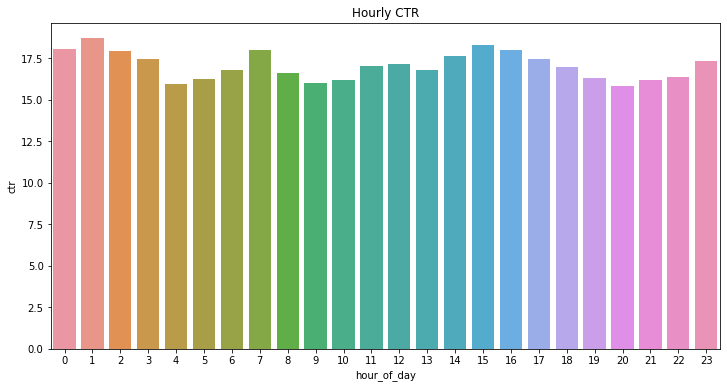

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(y='ctr', x='hour_of_day', data=df_hour)
plt.title('Hourly CTR');

Text(0.5, 1.0, 'click trends by day of week')

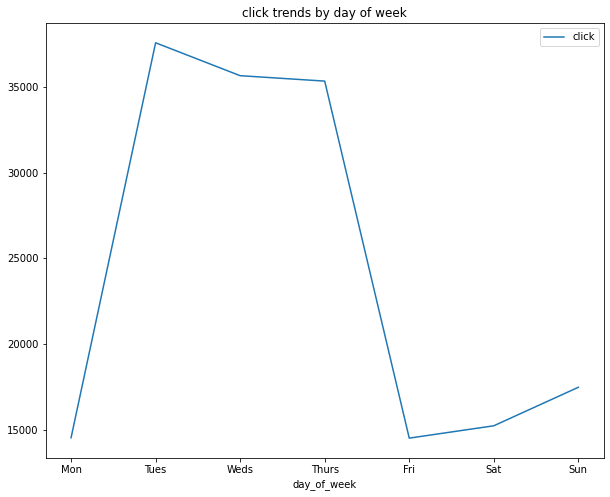

In [13]:
df['day_of_week'] = df['hour'].apply(lambda val: val.day_name())
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby('day_of_week').agg({'click':'sum'}).reindex(cats).plot(figsize=(10,8))
ticks = list(range(0,7,1))
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks,labels)
plt.title('click trends by day of week')

<AxesSubplot:title={'center':'Day of the week'}, xlabel='day_of_week'>

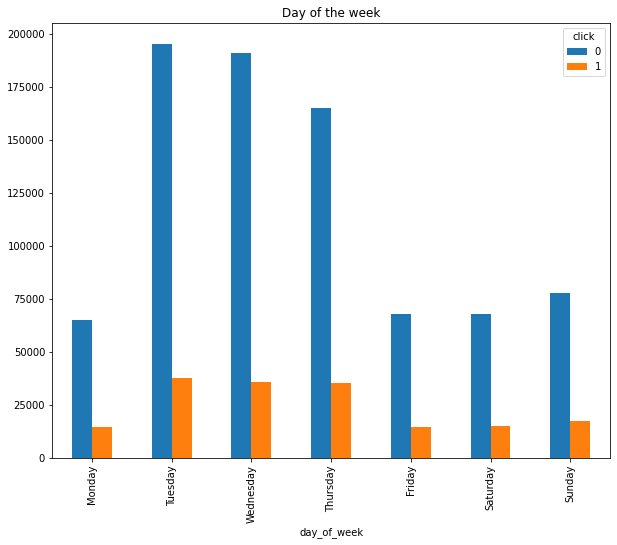

In [14]:
df.groupby(['day_of_week','click']).size().unstack().reindex(cats).plot(kind='bar',title='Day of the week',figsize=(10,8))


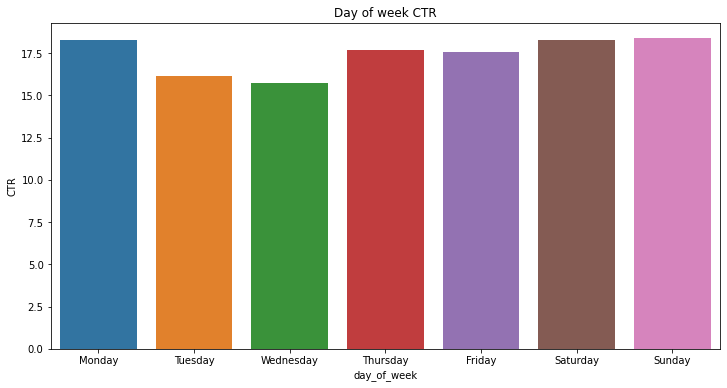

In [15]:
df_click = df[df['click'] == 1]
df_day_of_week = df[['day_of_week','click']].groupby('day_of_week').count().reset_index()
df_day_of_week = df_day_of_week.rename(columns={'click':'impression'})
df_day_of_week['clicks'] = df_click[['day_of_week','click']].groupby(['day_of_week']).count().reset_index()['click']
df_day_of_week['CTR'] = df_day_of_week['clicks']/df_day_of_week['impression']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_week', data=df_day_of_week, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of week CTR');

In [16]:
df['C1'].value_counts()/len(df)


1005    0.918331
1002    0.055073
1010    0.022484
1012    0.002890
1007    0.000861
1001    0.000231
1008    0.000130
Name: C1, dtype: float64

In [17]:
c1_values = df.C1.unique()
c1_values.sort()
ctr_avg_list=[]
for i in c1_values:
    ctr_avg=df.loc[np.where((df.C1 == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for C1 value: {},  click through rate: {}".format(i,ctr_avg))

for C1 value: 1001,  click through rate: 0.025974025974025976
for C1 value: 1002,  click through rate: 0.214805803206653
for C1 value: 1005,  click through rate: 0.16962946911298868
for C1 value: 1007,  click through rate: 0.03832752613240418
for C1 value: 1008,  click through rate: 0.13076923076923078
for C1 value: 1010,  click through rate: 0.09455612880270414
for C1 value: 1012,  click through rate: 0.1750865051903114


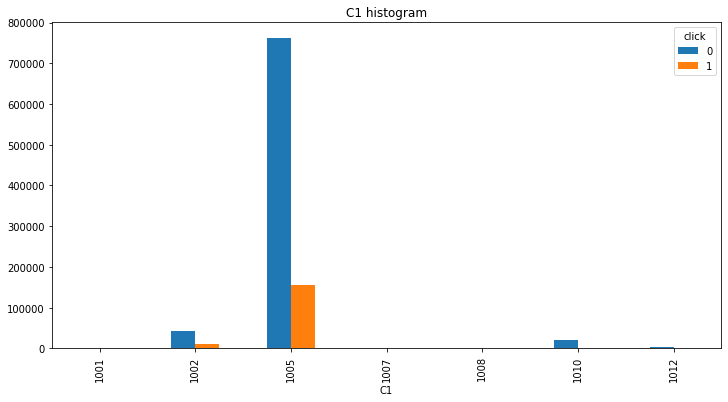

In [18]:
df.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

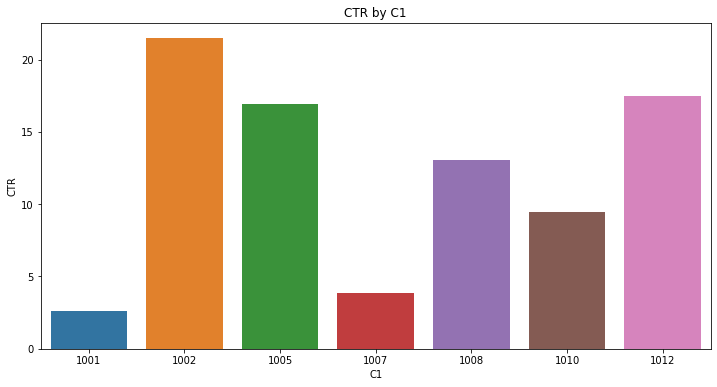

In [19]:
df_c1 = df[['C1','click']].groupby('C1').count().reset_index()
df_c1 = df_c1.rename(columns={'click':'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

In [20]:
df['banner_pos'].value_counts()/len(df)

0    0.719930
1    0.278270
7    0.001066
2    0.000343
4    0.000206
5    0.000130
3    0.000055
Name: banner_pos, dtype: float64

In [21]:
banner_pos = df.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=df.loc[np.where((df.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16501465420249192
for banner position: 1,  click through rate: 0.18340460703633163
for banner position: 2,  click through rate: 0.08746355685131195
for banner position: 3,  click through rate: 0.14545454545454545
for banner position: 4,  click through rate: 0.1650485436893204
for banner position: 5,  click through rate: 0.13076923076923078
for banner position: 7,  click through rate: 0.34709193245778613


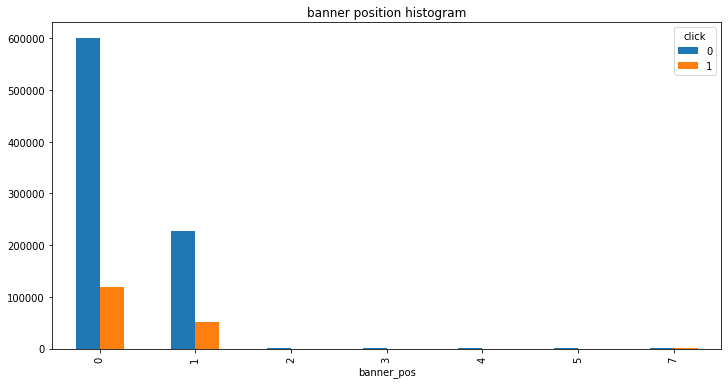

In [22]:
df.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position histogram');

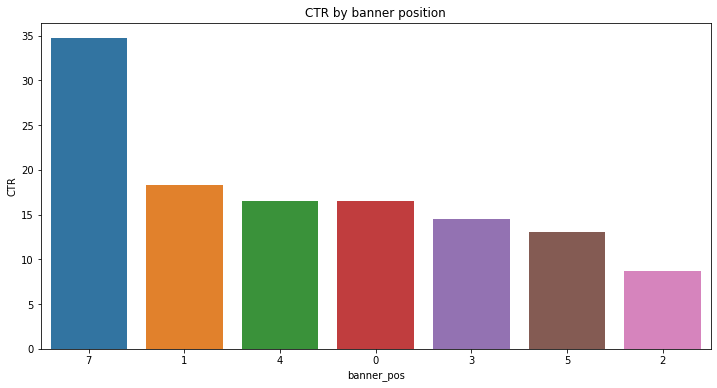

In [23]:
df_banner = df[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [24]:
print('The impressions by device types')
print((df.device_type.value_counts()/len(df)))

The impressions by device types
1    0.922442
0    0.055073
4    0.019249
5    0.003235
2    0.000001
Name: device_type, dtype: float64


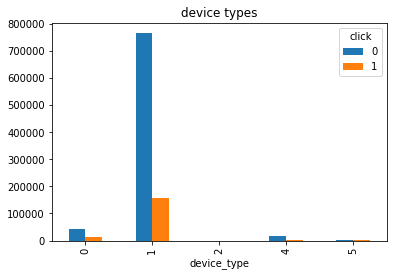

In [25]:
df[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

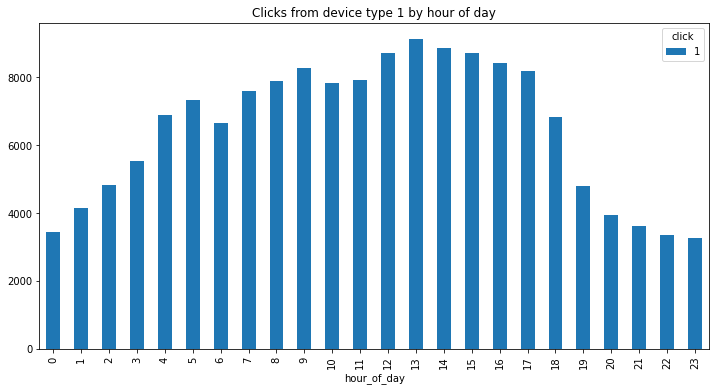

In [26]:
df_click[df_click['device_type']==1].groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Clicks from device type 1 by hour of day", figsize=(12,6));

In [27]:
device_type_click = df_click.groupby('device_type').agg({'click':'sum'}).reset_index()
device_type_impression = df.groupby('device_type').agg({'click':'count'}).reset_index().rename(columns={'click': 'impressions'})
merged_device_type = pd.merge(left = device_type_click , right = device_type_impression, how = 'inner', on = 'device_type')
merged_device_type['CTR'] = merged_device_type['click'] / merged_device_type['impressions']*100
merged_device_type

,device_type,click,impressions,CTR
0,0,11830,55073,21.480580
1,1,156338,922442,16.948274
2,4,1810,19249,9.403086
3,5,316,3235,9.768161


In [28]:
!pip install lightgbm

     |████████████████████████████████| 2.0 MB 76 kB/s             
You should consider upgrading via the '/home/bala/pythonProject/click-through-rate/venv/bin/python -m pip install --upgrade pip' command.


In [29]:
!pip install xgboost

     |████████████████████████████████| 192.9 MB 29 kB/s             
You should consider upgrading via the '/home/bala/pythonProject/click-through-rate/venv/bin/python -m pip install --upgrade pip' command.


In [30]:
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
df = convert_obj_to_int(df)

In [31]:
df.head()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,...,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int,day_of_week_int
0,10002044883120869786,0,2014-10-21,1005,0,1,0,19771,320,50,...,6091933502556384733,1296764332657713629,-7359077219340230902,5322530086138330505,768620288322387834,5963536153700097491,3807566507496275260,9076759982403128279,-4540916384087525213,7436131774910913427
1,10003539039235338011,0,2014-10-21,1005,0,1,0,15699,320,50,...,3711224606022772987,7880978449482140619,5956339403690995708,5322530086138330505,768620288322387834,5963536153700097491,3807566507496275260,9008088977611327703,-5794276720192723351,7436131774910913427
2,10014885175555340290,0,2014-10-21,1005,0,1,0,15705,320,50,...,3711224606022772987,7880978449482140619,5956339403690995708,5322530086138330505,768620288322387834,5963536153700097491,3807566507496275260,-3628680842713029564,-5284086219242835285,7436131774910913427
3,10018076683759767024,1,2014-10-21,1002,0,0,0,21300,320,50,...,-6838315590531101076,6948710282278773810,-4520035928539105174,5322530086138330505,768620288322387834,5963536153700097491,33055177904165129,8747562716544448858,2574140681313935860,7436131774910913427
4,10020307723259138743,0,2014-10-21,1005,0,1,0,18993,320,50,...,-2241383952972786053,1071984966499968656,-5068876331487955578,5322530086138330505,768620288322387834,5963536153700097491,3807566507496275260,-8607282237709151560,-1300312265779609384,7436131774910913427


In [32]:
df.drop('hour', axis=1, inplace=True)

In [33]:
df.drop('id', axis=1, inplace=True)

In [35]:
import lightgbm as lgb
X_train = df.loc[:, df.columns != 'click']
y_target = df.click.values
#create lightgbm dataset
msk = np.random.rand(len(X_train)) < 0.8
lgb_train = lgb.Dataset(X_train[msk], y_target[msk])
lgb_eval = lgb.Dataset(X_train[~msk], y_target[~msk], reference=lgb_train)


# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': { 'binary_logloss'},
    'num_leaves': 31, # defauly leaves(31) amount for each tree
    'learning_rate': 0.08,
    'feature_fraction': 0.7, # will select 70% features before training each tree
    'bagging_fraction': 0.3, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 5 iteration
    'verbose': 0
}
print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=lgb_eval,
                early_stopping_rounds=500)

Start training...


/home/bala/pythonProject/click-through-rate/venv/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's binary_logloss: 0.451897
Training until validation scores don't improve for 500 rounds
[2]	valid_0's binary_logloss: 0.447297
[3]	valid_0's binary_logloss: 0.443616
[4]	valid_0's binary_logloss: 0.440428
[5]	valid_0's binary_logloss: 0.437641
[6]	valid_0's binary_logloss: 0.435103
[7]	valid_0's binary_logloss: 0.433076
[8]	valid_0's binary_logloss: 0.431164
[9]	valid_0's binary_logloss: 0.429401
[10]	valid_0's binary_logloss: 0.427871
[11]	valid_0's binary_logloss: 0.426631
[12]	valid_0's binary_logloss: 0.425277
[13]	valid_0's binary_logloss: 0.423925
[14]	valid_0's binary_logloss: 0.422849
[15]	valid_0's binary_logloss: 0.421948
[16]	valid_0's binary_logloss: 0.421222
[17]	valid_0's binary_logloss: 0.420397
[18]	valid_0's binary_logloss: 0.41969

In [36]:
print(gbm.best_score)
print(gbm.best_iteration)

defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('binary_logloss', 0.4019367124016222)])})
1122


In [37]:
from operator import itemgetter
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score

def run_default_test(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 5
    subsample = 0.8
    colsample_bytree = 0.8
    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "logloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state
    }
    num_boost_round = 260
    early_stopping_rounds = 20
    test_size = 0.2

    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

In [38]:
features = ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'site_id_int', 'site_domain_int', 'site_category_int', 'app_id_int',
       'app_domain_int', 'app_category_int', 'device_id_int', 'device_ip_int',
       'device_model_int', 'day_of_week_int']
run_default_test(df, y_target, features, 'click')

XGBoost params. ETA: 0.1, MAX_DEPTH: 5, SUBSAMPLE: 0.8, COLSAMPLE_BY_TREE: 0.8
[14:55:07] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.64852	eval-logloss:0.64848
[1]	train-logloss:0.61222	eval-logloss:0.61217
[2]	train-logloss:0.58214	eval-logloss:0.58209
[3]	train-logloss:0.55731	eval-logloss:0.55727
[4]	train-logloss:0.53661	eval-logloss:0.53659
[5]	train-logloss:0.51933	eval-logloss:0.51932
[6]	train-logloss:0.50425	eval-logloss:0.50425
[7]	train-logloss:0.49179	eval-logloss:0.49183
[8]	train-logloss:0.48099	eval-logloss:0.48104
[9]	train-logloss:0.47180	eval-logloss:0.47189
[10]	train-logloss:0.46401	eval-logloss:0.46413
[11]	train-logloss:0.45738	eval-logloss:0.4575